In [1]:
%matplotlib inline

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stan_code = """
data {
  real<lower=0> r_e;
  real<lower=0> r_l;
  int<lower=1> T;
  int<lower=0> D[T];
}
transformed data {
  real log_unif;
  log_unif <- -log(T);
}
parameters {
  real<lower=0> e;
  real<lower=0> l;
}
transformed parameters {
  vector[T] lp;
  lp <- rep_vector(log_unif, T);
  for (s in 1:T)
    for (t in 1:T)
      lp[s] <- lp[s] + poisson_log(D[t], if_else(t < s, e, l));
}
model {
  e ~ exponential(r_e);
  l ~ exponential(r_l);
  increment_log_prob(log_sum_exp(lp));
}
generated quantities {
  int<lower=1,upper=T> s;
  s <- categorical_rng(softmax(lp));
}
"""

x=[1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961]

y=[4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
  
    
stan_dat = {
    'r_e' : 3,
    'r_l' : 2,
    'T': len(y),
    'D': y
}

fit = pystan.stan(model_code = stan_code, data = stan_dat, iter = 2500, chains = 4)
print(fit)

Inference for Stan model: anon_model_b512434462e6015076c6bc87af00981a.
4 chains, each with iter=2500; warmup=1250; thin=1; 
post-warmup draws per chain=1250, total post-warmup draws=5000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
e          2.9  4.5e-3   0.26   2.42   2.72   2.89   3.06   3.43   3346    1.0
l         0.92  2.0e-3   0.12    0.7   0.84   0.91   0.99   1.16   3208    1.0
lp[0]   -239.4    0.21  11.44 -264.6 -246.0 -238.7 -231.3 -220.0   3104    1.0
lp[1]   -236.8     0.2  11.06 -261.2 -243.1 -236.0 -228.9 -218.1   3102    1.0
lp[2]   -233.0    0.19  10.56 -256.6 -239.0 -232.3 -225.5 -215.2   3129    1.0
lp[3]   -230.3    0.18  10.18 -253.2 -236.1 -229.6 -223.1 -213.2   3126    1.0
lp[4]   -232.3    0.18  10.27 -255.2 -238.2 -231.6 -225.1 -215.1   3131    1.0
lp[5]   -233.1    0.18  10.24 -255.9 -239.0 -232.4 -225.9 -215.9   3101    1.0
lp[6]   -230.5    0.18   9.86 -252.5 -236.1 -229.8 -223.5 -214.0   3130    1.0
lp[7]   -229.0    0.1

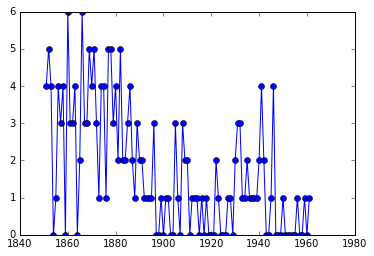

In [4]:
plt.plot(x,y,"o-")

In [5]:
ms=fit.extract()

In [33]:
s=ms['s']
e=ms['e']
l=ms['l']

sw=np.empty_like(s)
for i,j in enumerate(s):
    sw[i]=x[int(j)]

/Users/kaba32/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kaba32/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


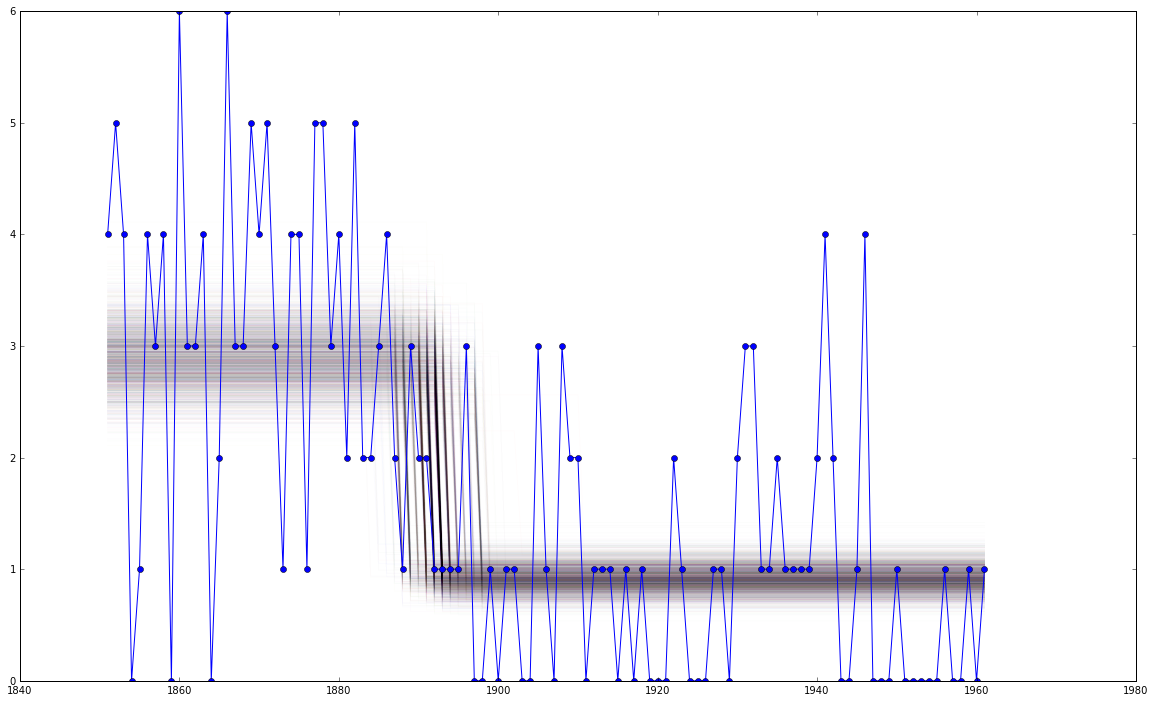

In [7]:
plt.rcParams['figure.figsize'] = (20, 12)

for i,switchpoint in enumerate(s):
    if np.random.uniform()>0.5:
        ex=np.ones(len(x))
        ex[:switchpoint] *=e[i]
        ex[switchpoint:] *=l[i]
        plt.plot(x,ex,alpha=0.01)
plt.plot(x,y,"bo-")

(array([  3.33333333e-03,   2.03703704e-03,   4.25925926e-03,
          5.12962963e-02,   7.57407407e-02,   3.01851852e-02,
          1.18333333e-01,   1.66296296e-01,   2.32592593e-01,
          1.07592593e-01,   4.09259259e-02,   2.01851852e-02,
          6.27777778e-02,   8.70370370e-03,   5.55555556e-04,
          7.40740741e-04,   0.00000000e+00,   1.85185185e-04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.85185185e-04]),
 array([ 1884.  ,  1885.08,  1886.16,  1887.24,  1888.32,  1889.4 ,
         1890.48,  1891.56,  1892.64,  1893.72,  1894.8 ,  1895.88,
         1896.96,  1898.04,  1899.12,  1900.2 ,  1901.28,  1902.36,
         1903.44,  1904.52,  1905.6 ,  1906.68,  1907.76,  1908.84,
         1909.92,  1911.  ]),
 <a list of 25 Patch objects>)

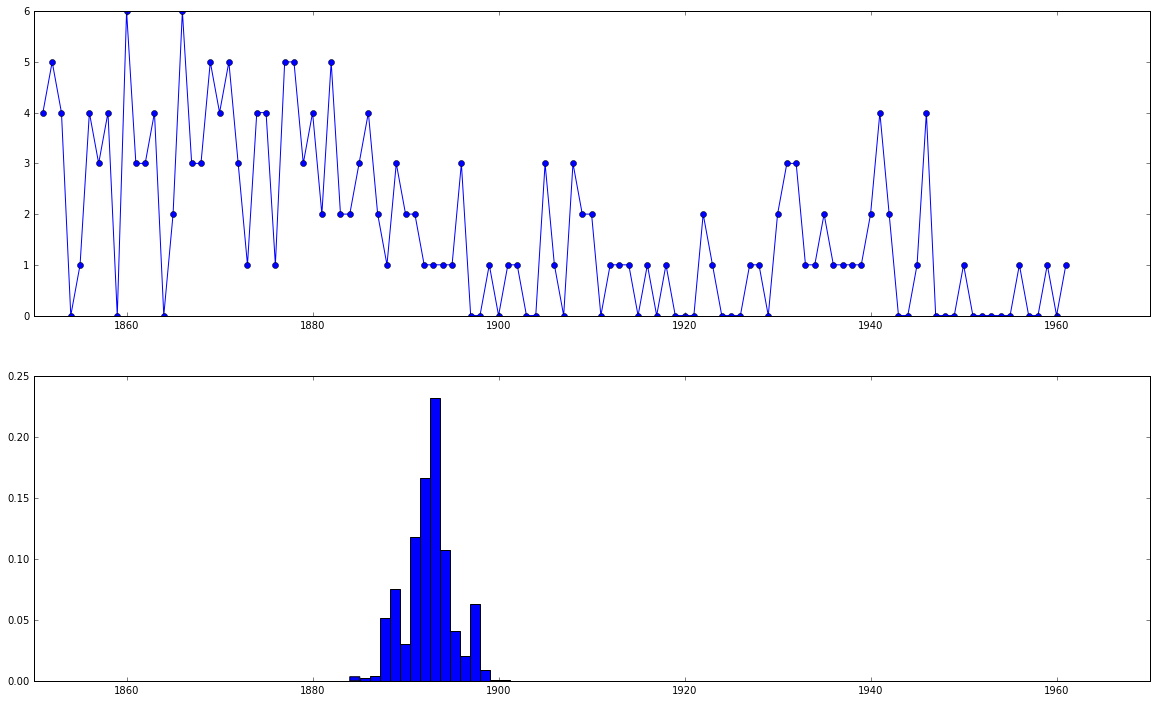

In [37]:
plt.subplot(2,1,1)
plt.xlim(1850,1970)
plt.plot(x,y,"bo-")
plt.subplot(2,1,2)
plt.xlim(1850,1970)
plt.hist(sw,bins=25,normed=True)

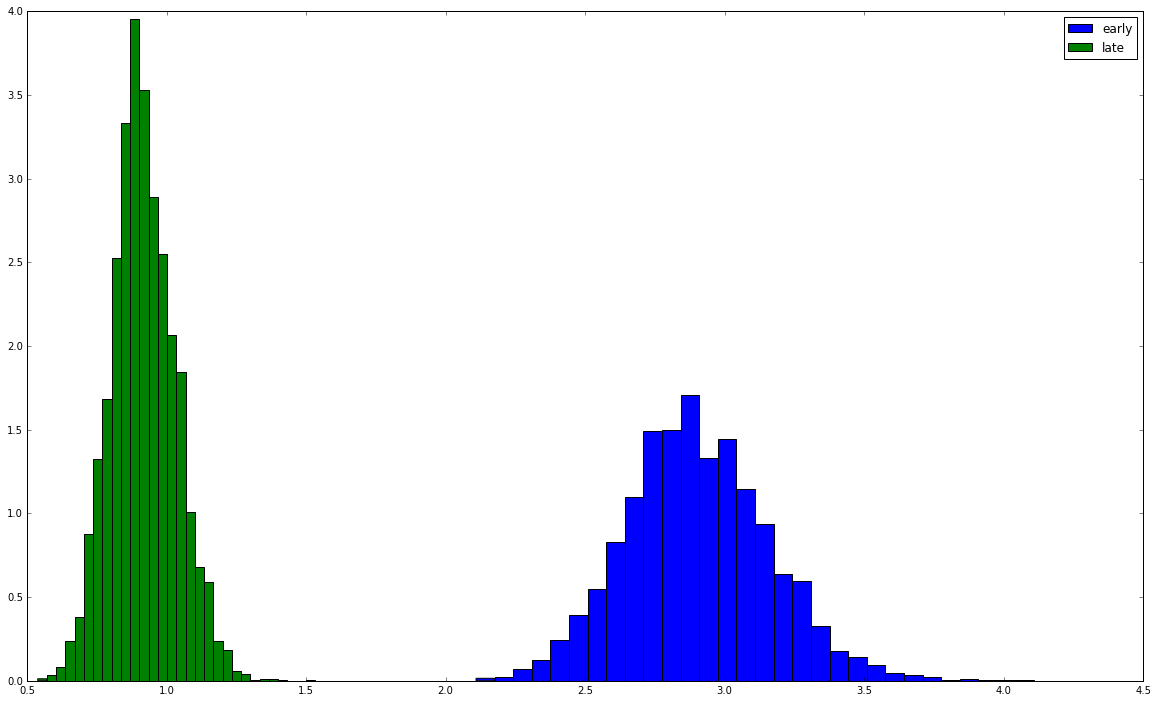

In [13]:
plt.hist(e,bins=30,label="early",normed=True)
plt.hist(l,bins=30,label="late",normed=True)
plt.legend()